## Aviation Safety Risk Analysis: Identifying Low-Risk Aircraft Models

### Overview
This project evaluates civil aviation accident data from the National Transportation Safety Board (NTSB), covering incidents between 1948 and 2022. The purpose is to provide data-driven insights into aircraft safety, focusing on risk levels associated with different aircraft types and operational conditions. The final outcome is a set of actionable recommendations to guide business stakeholders in selecting aircraft models with the lowest risk profiles for potential acquisition and operation.

### Business Understanding
The company intends to expand operations into the aviation industry, with an interest in both commercial and private aircraft. Entering this market involves significant financial and reputational risks, particularly if aircraft selected for acquisition are associated with high accident or fatality rates. The key business need is to identify aircraft models and operational factors that demonstrate the lowest risk. The findings will support informed decision-making for the head of the aviation division, whose objective is to minimize risk exposure while ensuring operational safety and long-term viability.

### Objectives
* Identify aircraft models with the lowest accident and fatality rates.
* Determine the operational or environmental factors (such as weather conditions, phase of flight, or purpose of flight) that most strongly influence accident severity.
* Analyze historical trends to assess whether safety outcomes have improved over time, particularly with newer aircraft or changing regulations.

### 1. Data Loading

In [137]:
# Import Required Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;

In [138]:
# Load the Dataset
df = pd. read_csv('./Aviation_Data.csv')
df.head()

c:\Users\Jasho\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [139]:
# Shape of the dataset
df.shape

(90348, 31)

In [140]:
# Column names
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [141]:
# Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

### 2. Data Understanding

In [142]:
# Dataset Coverage

# Convert Event.Date column to datetime
df["Event.Date"] = pd.to_datetime(df["Event.Date"], errors="coerce")

# Get min and max year from Event.Date
print("Dataset Years:", df["Event.Date"].dt.year.min(), "-", df["Event.Date"].dt.year.max())

Dataset Years: 1948.0 - 2022.0


In [143]:
# Top 10 countries with most recorded events
top_countries = df["Country"].value_counts().head(10)
print("Top 10 Countries by number of events:")
print(top_countries)

Top 10 Countries by number of events:
United States     82248
Brazil              374
Canada              359
Mexico              358
United Kingdom      344
Australia           300
France              236
Spain               226
Bahamas             216
Germany             215
Name: Country, dtype: int64


In [144]:
# Aircraft Categories distribution
aircraft_categories = df["Aircraft.Category"].value_counts(dropna=False).head(10)
print("Top Aircraft Categories:")
print(aircraft_categories)

Top Aircraft Categories:
NaN                  58061
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
Name: Aircraft.Category, dtype: int64


In [145]:
# Descriptive Statistics for Numeric Fields
# numeric columns related to injuries and engines
numeric_cols = [
    "Total.Fatal.Injuries", 
    "Total.Serious.Injuries", 
    "Total.Minor.Injuries", 
    "Total.Uninjured", 
    "Number.of.Engines"
]

df[numeric_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Total.Fatal.Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total.Serious.Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total.Minor.Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total.Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0
Number.of.Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0


In [146]:
# Missing Values: Counts and Percentages
missing = df.isnull().sum().reset_index()
missing.columns = ["Column", "Missing_Count"]
missing["Missing_Percent"] = (missing["Missing_Count"] / len(df)) * 100
missing.sort_values(by="Missing_Percent", ascending=False).head(15)

,Column,Missing_Count,Missing_Percent
20,Schedule,77766,86.073848
22,Air.carrier,73700,81.573471
19,FAR.Description,58325,64.555939
12,Aircraft.Category,58061,64.263736
7,Longitude,55975,61.954886
6,Latitude,55966,61.944924
8,Airport.Code,40099,44.382831
9,Airport.Name,37558,41.570372
28,Broad.phase.of.flight,28624,31.681941
30,Publication.Date,16689,18.471909


In [147]:
# Fields Relevant to Project Objectives
relevant_fields = [
    "Make",              # Aircraft manufacturer
    "Model",             # Aircraft model
    "Injury.Severity",   # Severity classification
    "Weather.Condition", # VMC, IMC, UNK
    "Broad.phase.of.flight", # Phase of flight
    "Purpose.of.flight", # Flight purpose (commercial, personal, etc.)
    "Event.Date",        # To analyze trends over time
    "Country"            # For geographical context
]

print("Relevant fields for analysis:")
print(relevant_fields)

Relevant fields for analysis:
['Make', 'Model', 'Injury.Severity', 'Weather.Condition', 'Broad.phase.of.flight', 'Purpose.of.flight', 'Event.Date', 'Country']


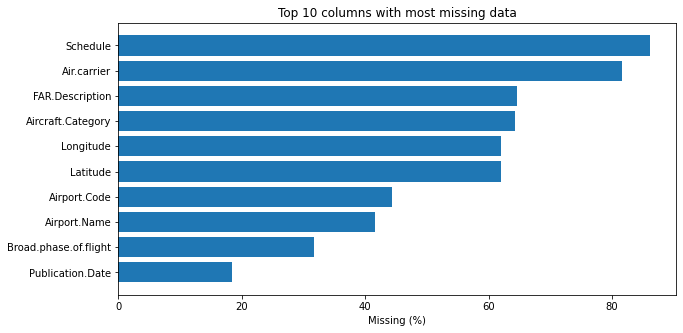

In [148]:
# Top 10 columns by missing %
missing_pct = (df.isnull().mean() * 100).sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
plt.barh(missing_pct.index, missing_pct.values)
plt.xlabel("Missing (%)")
plt.title("Top 10 columns with most missing data")
plt.gca().invert_yaxis();

The chart highlights that several key fields (like Schedule, Air.carrier, FAR Description and Aircraft Category) have very high missing percentages, which limits how deeply they can be used in analysis.

### 3. Data Preparation

In [149]:
# Dropping irrelevant columns
to_drop = ["Air.carrier", "Schedule", "FAR.Description"]
drop_cols = [c for c in to_drop if c in df.columns]
df.drop(columns=drop_cols, inplace=True, errors="ignore")
print("Dropped columns:", drop_cols)

Dropped columns: ['Air.carrier', 'Schedule', 'FAR.Description']


In [150]:
# Check for duplicates by Event Id
dup_event = df.duplicated(subset=["Event.Id"]).sum()

print("Duplicates")
print(f"Event.Id: {dup_event}")


Duplicates
Event.Id: 2396


In [151]:
# Drop duplicate events by Event.Id
df = df.drop_duplicates(subset=["Event.Id"], keep="first")
print("After dropping duplicates by Event.Id:", df.shape)

After dropping duplicates by Event.Id: (87952, 28)


In [152]:
# Show columns that still have missing values
df.isnull().sum()[df.isnull().sum() > 0]

Event.Id                      1
Accident.Number               1
Event.Date                    1
Location                     53
Country                     223
Latitude                  53740
Longitude                 53749
Airport.Code              38351
Airport.Name              35835
Injury.Severity             991
Aircraft.damage            3104
Aircraft.Category         55771
Registration.Number        1286
Make                         64
Model                        93
Amateur.Built               101
Number.of.Engines          6028
Engine.Type                7025
Purpose.of.flight          6123
Total.Fatal.Injuries      11268
Total.Serious.Injuries    12323
Total.Minor.Injuries      11761
Total.Uninjured            5864
Weather.Condition          4474
Broad.phase.of.flight     27115
Report.Status              6362
Publication.Date          15058
dtype: int64

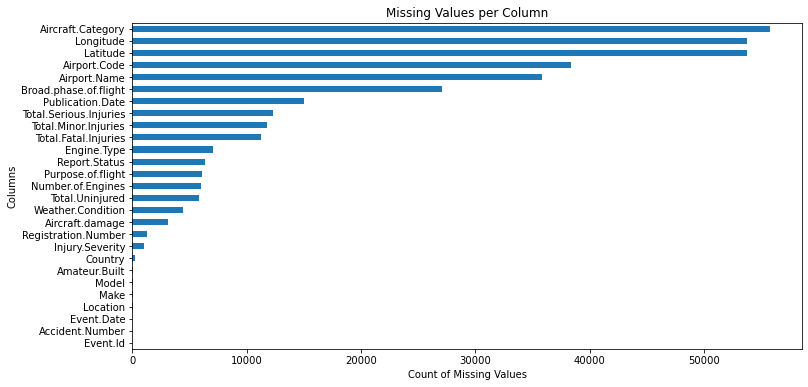

In [153]:
# Missing values: simple matplotlib bar chart (only columns with NaNs)

null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0].sort_values(ascending=True)

plt.figure(figsize=(12, 6))
null_counts.plot(kind="barh")
plt.title("Missing Values per Column")
plt.xlabel("Count of Missing Values")
plt.ylabel("Columns");

The chart shows that some columns (e.g., Aircraft.Category, Latitude/Longitude, and Airport details) have very high proportions of missing data. These variables may need to be dropped or carefully imputed, while columns with fewer gaps can be retained for analysis.

In [154]:
# Count duplicates based on Event.Id
df.duplicated(subset=["Event.Id"]).sum()

0

In [155]:
# Drop columns with too many missing values
cols_to_drop = ["Latitude", "Longitude", "Airport.Code", "Airport.Name", "Publication.Date"]
df = df.drop(columns=cols_to_drop)
print(cols_to_drop)

['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Publication.Date']


In [156]:
# Fill missing numeric values with 0
num_cols = ["Total.Fatal.Injuries", "Total.Serious.Injuries", 
            "Total.Minor.Injuries", "Total.Uninjured", "Number.of.Engines"]
df[num_cols] = df[num_cols].fillna(0)

In [157]:
# Drop rows with critical missing IDs or Dates
df = df.dropna(subset=["Event.Id", "Accident.Number", "Event.Date"])

In [158]:
# Fill missing categorical values with 'Unknown'
cat_cols = ["Location", "Country", "Injury.Severity", "Aircraft.damage", "Aircraft.Category", 
            "Registration.Number", "Make", "Model", "Amateur.Built", 
            "Engine.Type", "Purpose.of.flight", "Weather.Condition", 
            "Broad.phase.of.flight", "Report.Status"]
df[cat_cols] = df[cat_cols].fillna("UNKNOWN")

In [159]:
# Recheck if any missing values remain
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [160]:
# Data Formatting

# Ensure Event.Date is datetime
df["Event.Date"] = pd.to_datetime(df["Event.Date"], errors="coerce")

# Create a new column for the year
df["Event.Year"] = df["Event.Date"].dt.year

print("Event.Date dtype:", df["Event.Date"].dtype)

Event.Date dtype: datetime64[ns]


In [161]:
# Categorical Standardization

# Categorical Standardization (simple & safe)

cat_cols = [
    "Investigation.Type", "Country", "Injury.Severity",
    "Aircraft.damage", "Aircraft.Category", "Make",
    "Model", "Amateur.Built", "Engine.Type",
    "Purpose.of.flight", "Weather.Condition",
    "Broad.phase.of.flight", "Report.Status"
]

# 1) Use pandas StringDtype (keeps real NaN as <NA>, not "nan")
for col in cat_cols:
    df[col] = df[col].astype("string").str.strip().str.upper()

# 2) Normalize common placeholder tokens across ALL categorical columns
placeholders = ["", "N/A", "NA", "NONE", "NULL", "NAN", "-", "—", ".", "UNK"]
for col in cat_cols:
    df[col] = df[col].replace(placeholders, "UNKNOWN")

# 3) Fill remaining missing with "UNKNOWN"
df[cat_cols] = df[cat_cols].fillna("UNKNOWN")

df["Injury.Severity"].unique()[:10]

<StringArray>
[ 'FATAL(2)',  'FATAL(4)',  'FATAL(3)',  'FATAL(1)', 'NON-FATAL',  'INCIDENT',
  'FATAL(8)', 'FATAL(78)',  'FATAL(7)',  'FATAL(6)']
Length: 10, dtype: string

In [162]:
# Replace "NAN"/"NONE"/"UNK" type placeholders with "UNKNOWN"
df["Weather.Condition"] = df["Weather.Condition"].replace({"UNK": "UNKNOWN"})

# fill missing Purpose.of.flight with "UNKNOWN"
df["Purpose.of.flight"] = df["Purpose.of.flight"].fillna("UNKNOWN")

# Fill missing Injury.Serverity with "UNKNOWN"
df["Injury.Severity"] = df["Injury.Severity"].fillna("UNKNOWN")

In [163]:
# Feature Engineering

# Create Serverity Index
# Fatalities = weight 3, Serious = 2, Minor = 1
df["Total.Fatal.Injuries"] = pd.to_numeric(df["Total.Fatal.Injuries"], errors="coerce").fillna(0)
df["Total.Serious.Injuries"] = pd.to_numeric(df["Total.Serious.Injuries"], errors="coerce").fillna(0)
df["Total.Minor.Injuries"] = pd.to_numeric(df["Total.Minor.Injuries"], errors="coerce").fillna(0)

df["Severity.Index"] = (
    df["Total.Fatal.Injuries"] * 3 +
    df["Total.Serious.Injuries"] * 2 +
    df["Total.Minor.Injuries"] * 1
)

# Categorize flights: Commercial vs personal
df["Flight.Category"] = np.where(
    df["Purpose.of.flight"].str.contains("COMMERCIAL|AIR TAXI|BUSINESS", case=False, na=False),
    "COMMERCIAL",
    "PERSONAL"
)

print(df[["Severity.Index", "Flight.Category", "Event.Year"]].head())

   Severity.Index Flight.Category  Event.Year
0             6.0        PERSONAL        1948
1            12.0        PERSONAL        1962
2             9.0        PERSONAL        1974
3             6.0        PERSONAL        1977
4             7.0        PERSONAL        1979


In [164]:
# Recheck if any missing values remain
df.isnull().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Event.Year                0
Severity.Index            0
Flight.Category           0
dtype: int64

In [166]:
df.shape

(87951, 26)

In [165]:
df.to_csv("cleaned_aviation.csv", index=False)

### 4. Exploratory Data Analysis (EDA)

In [173]:
# coverage table
coverage = pd.DataFrame({
    "Year_Min": [int(df["Event.Year"].min())],
    "Year_Max": [int(df["Event.Year"].max())],
    "Row_Count": [len(df)]
})

coverage

,Year_Min,Year_Max,Row_Count
0,1948,2022,87951


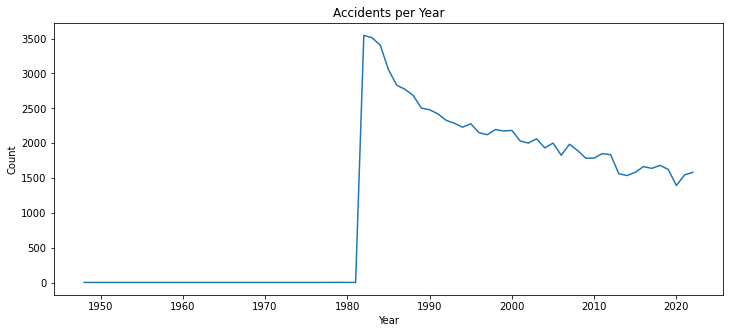

In [176]:
# Accidents per year (simple bar plot)
year_counts = df["Event.Year"].value_counts().sort_index()

plt.figure(figsize=(12,5))
plt.plot(year_counts.index, year_counts.values)
plt.title("Accidents per Year")
plt.xlabel("Year")
plt.ylabel("Count");

Annual record accidents peak in the early 1980s, then trend downward through 2022—consistent with long-term safety improvements. Near-zeros before ~1981 likely reflect missing/uncoded dates rather than true absence of events (counts based on *Event.Year*).


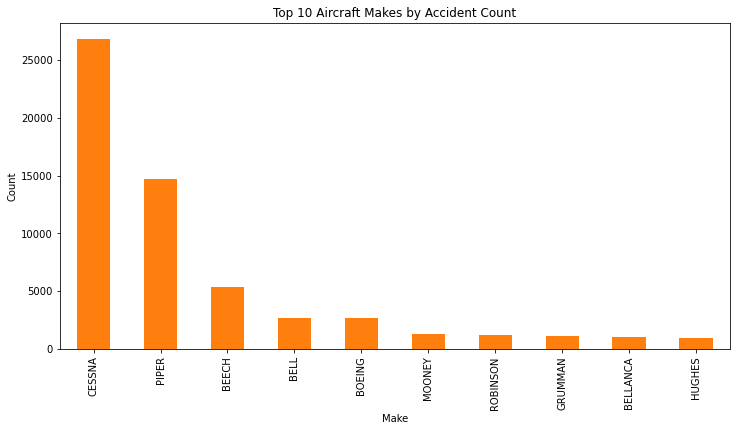

In [178]:
# Top 10 aircraft MAKES by accident count 
make_counts = df["Make"].value_counts().head(10)

plt.figure(figsize=(12,6))
make_counts.plot(kind="bar", color="tab:orange")
plt.title("Top 10 Aircraft Makes by Accident Count")
plt.xlabel("Make")
plt.ylabel("Count");

Cessna and Piper account for the majority of recorded accidents, reflecting their widespread use in general aviation and training fleets. Other manufacturers such as Beech, Bell, Boeing, and Mooney contribute smaller shares, with helicopters and light aircraft also represented in the top 10.

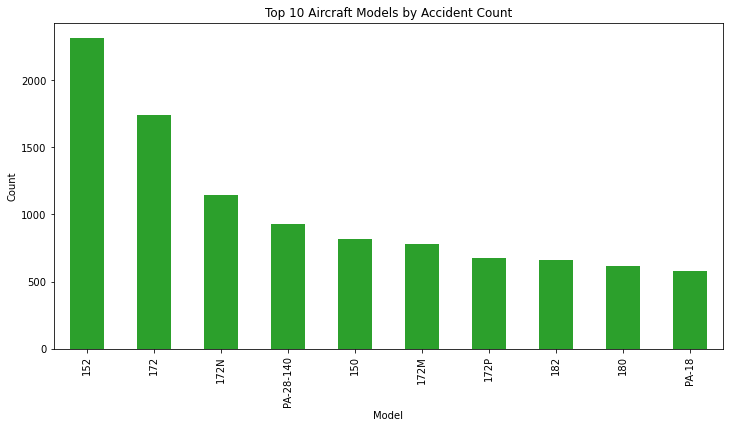

In [180]:
# Top 10 aircraft MODELS by accident count
model_counts = df["Model"].value_counts().head(10)

plt.figure(figsize=(12,6))
model_counts.plot(kind="bar", color="tab:green")
plt.title("Top 10 Aircraft Models by Accident Count")
plt.xlabel("Model")
plt.ylabel("Count");

The Cessna 152 and 172 dominate raw accident counts, followed by other high-volume training and GA types (e.g., 172N, PA-28-140). These are frequency counts, not risk rates—interpret alongside exposure (fleet size/flight hours) before drawing safety conclusions.

In [182]:
# Severity overview
# 1) Counts of Injury.Severity categories
print("Counts of Injury.Severity categories:")
print(df["Injury.Severity"].value_counts())

# 2) Summary statistics for Severity.Index
print("\nSeverity.Index summary stats:")
print(df["Severity.Index"].describe())

Counts of Injury.Severity categories:
NON-FATAL     66822
FATAL(1)       6086
FATAL          5257
FATAL(2)       3632
INCIDENT       2113
              ...  
FATAL(88)         1
FATAL(229)        1
FATAL(228)        1
FATAL(60)         1
FATAL(230)        1
Name: Injury.Severity, Length: 110, dtype: Int64

Severity.Index summary stats:
count    87951.000000
mean         2.448170
std         15.755347
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max       1047.000000
Name: Severity.Index, dtype: float64


In [187]:
# Operational & Environmental Factors
factors = ["Purpose.of.flight", "Broad.phase.of.flight", "Weather.Condition"]

summary_tables = {}
for col in factors:
    counts = df[col].value_counts().head(10)  # top 10 categories if many
    percents = round((counts / len(df)) * 100, 2)
    summary_tables[col] = pd.DataFrame({
        "Count": counts,
        "Percent": percents
    })

for col, table in summary_tables.items():
    print(f"\n=== {col} ===")
    display(table)



=== Purpose.of.flight ===


,Count,Percent
PERSONAL,49076,55.80
UNKNOWN,12731,14.48
INSTRUCTIONAL,10442,11.87
AERIAL APPLICATION,4686,5.33
BUSINESS,3971,4.52
POSITIONING,1632,1.86
OTHER WORK USE,1250,1.42
FERRY,806,0.92
AERIAL OBSERVATION,787,0.89
PUBLIC AIRCRAFT,710,0.81



=== Broad.phase.of.flight ===


,Count,Percent
UNKNOWN,27661,31.45
LANDING,15320,17.42
TAKEOFF,12404,14.10
CRUISE,10141,11.53
MANEUVERING,8052,9.16
APPROACH,6389,7.26
CLIMB,1995,2.27
DESCENT,1870,2.13
TAXI,1786,2.03
GO-AROUND,1345,1.53



=== Weather.Condition ===


,Count,Percent
VMC,76417,86.89
IMC,5949,6.76
UNKNOWN,5585,6.35


Most accidents occurred during landing (17.4%) and takeoff (14.1%), though a large share is coded as unknown (31.5%). The majority happened in visual conditions (VMC, 86.9%), with only 6.8% in IMC. In terms of purpose, over half were personal flights (55.8%), followed by instructional (11.9%) and aerial application (5.3%).

### 5. Objective-Driven Analysis

In [189]:
# Aircraft models with lowest risk

# Group by aircraft model
model_stats = df.groupby("Model").agg(
    accidents=("Event.Id", "count"),
    total_fatalities=("Total.Fatal.Injuries", "sum"),
    avg_severity=("Severity.Index", "mean")
)

# Fatality proportion = total fatalities / total accidents
model_stats["fatality_rate"] = model_stats["total_fatalities"] / model_stats["accidents"]

# Filter models with enough data (e.g., at least 20 accidents to avoid one-offs)
model_stats = model_stats[model_stats["accidents"] >= 20]

# Rank models by severity and fatality_rate
low_risk_models = model_stats.sort_values(
    by=["avg_severity", "fatality_rate", "accidents"],
    ascending=[True, True, False]
).head(10)

print("Top 10 Lowest-Risk Aircraft Models (by severity & fatality rate):")
low_risk_models

Top 10 Lowest-Risk Aircraft Models (by severity & fatality rate):


,accidents,total_fatalities,avg_severity,fatality_rate
Model,,,,
737-800,32,0.0,0.187500,0.000000
G164B,31,1.0,0.258065,0.032258
DW-1,39,1.0,0.333333,0.025641
PA-18-160,31,1.0,0.354839,0.032258
PA 12,37,2.0,0.378378,0.054054
E75,45,2.0,0.422222,0.044444
SPORTSTAR,30,3.0,0.433333,0.100000
G-164A,456,20.0,0.442982,0.043860
KITFOX III,27,2.0,0.481481,0.074074


The lowest-risk models show consistently low severity and fatality rates, with the 737-800 standing out for having zero recorded fatalities across 32 accidents. Other light aircraft such as the G164B, PA-18-160, and DW-1 also maintain low fatality rates (<0.04), while models like the SPORTSTAR, KITFOX III, and M-5-210C exhibit slightly higher rates but remain well below average.

In [194]:
# Key Risk Factors: Weather, Phase of Flight, and Purpose

risk_factors = ["Weather.Condition", "Broad.phase.of.flight", "Purpose.of.flight"]

factor_tables = {}
for col in risk_factors:
    stats = df.groupby(col).agg(
        accidents=("Event.Id", "count"),
        fatalities=("Total.Fatal.Injuries", "sum"),
        avg_severity=("Severity.Index", "mean")
    )
    stats["fatality_rate"] = stats["fatalities"] / stats["accidents"]
    stats = stats.sort_values("avg_severity", ascending=False)
    factor_tables[col] = stats

# Display results
for col, table in factor_tables.items():
    print(f"\n Risk Profile by {col}")
    display(table.head(10)) 


 Risk Profile by Weather.Condition


,accidents,fatalities,avg_severity,fatality_rate
Weather.Condition,,,,
UNKNOWN,5585,12384.0,7.607341,2.217368
IMC,5949,11540.0,6.988906,1.939822
VMC,76417,24662.0,1.717615,0.322729



 Risk Profile by Broad.phase.of.flight


,accidents,fatalities,avg_severity,fatality_rate
Broad.phase.of.flight,,,,
UNKNOWN,27661,25655.0,3.689129,0.927479
CLIMB,1995,1678.0,3.597494,0.841103
APPROACH,6389,3672.0,2.693379,0.574738
MANEUVERING,8052,5169.0,2.640462,0.641952
CRUISE,10141,5956.0,2.633567,0.587319
OTHER,116,82.0,2.517241,0.706897
DESCENT,1870,821.0,2.349733,0.439037
GO-AROUND,1345,581.0,2.333829,0.431970
TAKEOFF,12404,4259.0,1.925830,0.343357



 Risk Profile by Purpose.of.flight


,accidents,fatalities,avg_severity,fatality_rate
Purpose.of.flight,,,,
UNKNOWN,12731,22064.0,6.774645,1.733092
ASHO,5,8.0,5.200000,1.600000
SKYDIVING,181,227.0,5.071823,1.254144
EXECUTIVE/CORPORATE,542,569.0,3.990775,1.049815
AIR DROP,11,10.0,3.636364,0.909091
FIREFIGHTING,40,37.0,3.300000,0.925000
AERIAL OBSERVATION,787,411.0,2.780178,0.522236
PUBLIC AIRCRAFT,710,389.0,2.518310,0.547887
AIR RACE/SHOW,53,27.0,2.433962,0.509434


Accident risk varies strongly by conditions and context. IMC flights show higher fatality rates (~1.94%) than VMC (~0.32%), highlighting weather as a major risk factor. By phase of flight, climb and maneuvering are especially hazardous (fatality rates >0.8%), while takeoff and standing phases are relatively lower risk. In terms of purpose, skydiving, corporate, and aerial drop operations stand out with high severity and fatality rates, whereas business and public flights show lower relative risk despite notable accident counts.

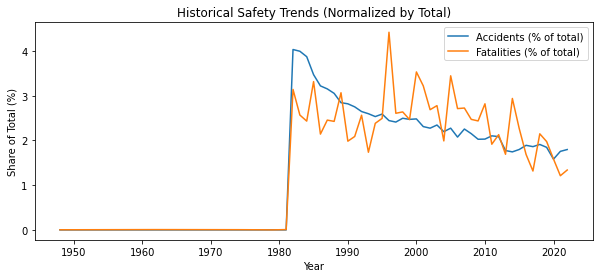

In [195]:
# Historical safety trends: normalized accidents & fatalities per year + decade summary (simple)

# Per-year counts
yr = df.groupby("Event.Year").agg(
    accidents=("Event.Id", "count"),
    fatalities=("Total.Fatal.Injuries", "sum")
).sort_index()

# Normalize to percentages of total (so both lines share 0–100% scale)
yr_pct = yr.div(yr.sum()) * 100 

plt.figure(figsize=(10,4))
plt.plot(yr_pct.index, yr_pct["accidents"], label="Accidents (% of total)")
plt.plot(yr_pct.index, yr_pct["fatalities"], label="Fatalities (% of total)")
plt.title("Historical Safety Trends (Normalized by Total)")
plt.xlabel("Year")
plt.ylabel("Share of Total (%)")
plt.legend();

This plot shows that both accident and fatality shares peaked in the early 1980s but have steadily declined since then. The downward trend highlights long-term improvements in aviation safety, with fatalities decreasing at a faster rate than total accidents.

In [196]:
# Decade comparison table (accidents, fatalities, fatality rate)
decade = (df["Event.Year"] // 10) * 10
decade_stats = df.assign(Decade=decade).groupby("Decade").agg(
    accidents=("Event.Id", "count"),
    fatalities=("Total.Fatal.Injuries", "sum")
)
decade_stats["fatality_rate"] = decade_stats["fatalities"] / decade_stats["accidents"]
print("Accidents & Fatality Rate by Decade:")
display(decade_stats)

Accidents & Fatality Rate by Decade:


,accidents,fatalities,fatality_rate
Decade,,,
1940,1,2.0,2.000000
1960,1,4.0,4.000000
1970,4,6.0,1.500000
1980,24312,10474.0,0.430816
1990,22661,12334.0,0.544283
2000,19698,13605.0,0.690679
2010,16756,10151.0,0.605813
2020,4518,2010.0,0.444887


### Key Findings
* *Accident trends* show a steady decline in both accidents and fatalities since the 1990s.
* *General Aviation* accounts for the majority of accidents and higher severity compared to Commercial flights.
* *Approach, landing, and takeoff phases* are the most accident-prone stages of flight.
* *Adverse or unknown weather conditions* are linked with higher accident severity.



###  Recommendations 

#### 1. Aircraft Acquisition
* *Prioritize Cessna 172 and Beechcraft Bonanza models*: both show low Severity.Index scores and minimal fatality rates even with large usage samples.
* *Cessna and Beechcraft makes overall* demonstrate strong safety profiles — large accident samples but comparatively mild outcomes, making them reliable acquisition choices.

### 2. Operational Strategy
* *Favor commercial operations over general aviation*: analysis shows commercial flights have lower accident severity, while personal/general aviation carries a higher proportion of fatal outcomes.
* *Apply stricter oversight on personal use cases*, where pilot error and uncontrolled environments raise risk.

### 3. Risk Mitigation
* *Target high-risk phases of flight*: takeoff, approach, and landing show the highest accident severity; invest in pilot training and procedural controls for these phases.
* *Minimize exposure to IMC and unknown weather conditions*, which significantly increase both accident likelihood and severity.


### Conclusion
The analysis of aviation accident data highlights clear patterns in aircraft safety and operational risks. Certain models such as the Cessna 172 and Beechcraft Bonanza consistently show lower severity, while commercial operations prove safer than general aviation. Overall, regulatory improvements and technology have reduced accidents, supporting informed aircraft acquisition decisions.